<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Gradient Boosting

In [38]:
!gdown 1boIax8d9Sat6OJzkiIjjpqmtSZKuRYrx

Downloading...
From: https://drive.google.com/uc?id=1boIax8d9Sat6OJzkiIjjpqmtSZKuRYrx
To: /content/ElectricCarData.csv
100% 8.20k/8.20k [00:00<00:00, 31.7MB/s]


### Import of required libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

### Reading the dataset


This is a dataset of electric vehicles.

It contains the following columns:


*   Brand
*   Model
*   AccelSec - Acceleration as 0-100 km/h
*   TopSpeed_KmH - The top speed in km/h
*   Range_Km - Range in km
*   Efficiency_WhKm - Efficiency Wh/km
*   FastCharge_KmH - Charge km/h
*   RapidCharge - Yes / No
*   PowerTrain - Front, rear, or all wheel drive
*   PlugType
*   BodyStyle - Basic size or style
*   Segment - Market segment
*   Seats - Number of seats
*   PriceEuro - Price in Germany before tax incentives




TASK:
Predict the target 'PriceEuro' and compare the performance of the DecisionTreeRegressor and the XGBRegressor models.

In [39]:
data = pd.read_csv('/content/ElectricCarData.csv')

In [40]:
data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


### Encode string variables

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [43]:
encoder = LabelEncoder()

In [44]:
for col in ['Brand', 'Model', 'RapidCharge','PlugType', 'BodyStyle', 'Segment', 'PowerTrain','FastCharge_KmH']:
    data[col] = encoder.fit_transform(data[col])

In [45]:
data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,4.6,233,450,161,50,1,0,2,7,3,5,55480
1,31,33,10.0,160,270,167,7,1,2,2,1,2,5,30000
2,23,0,4.7,210,400,181,36,1,0,2,2,3,5,56440
3,2,101,6.8,180,360,206,32,1,2,2,6,3,5,68040
4,9,78,9.5,145,170,168,2,1,2,2,1,1,4,32997


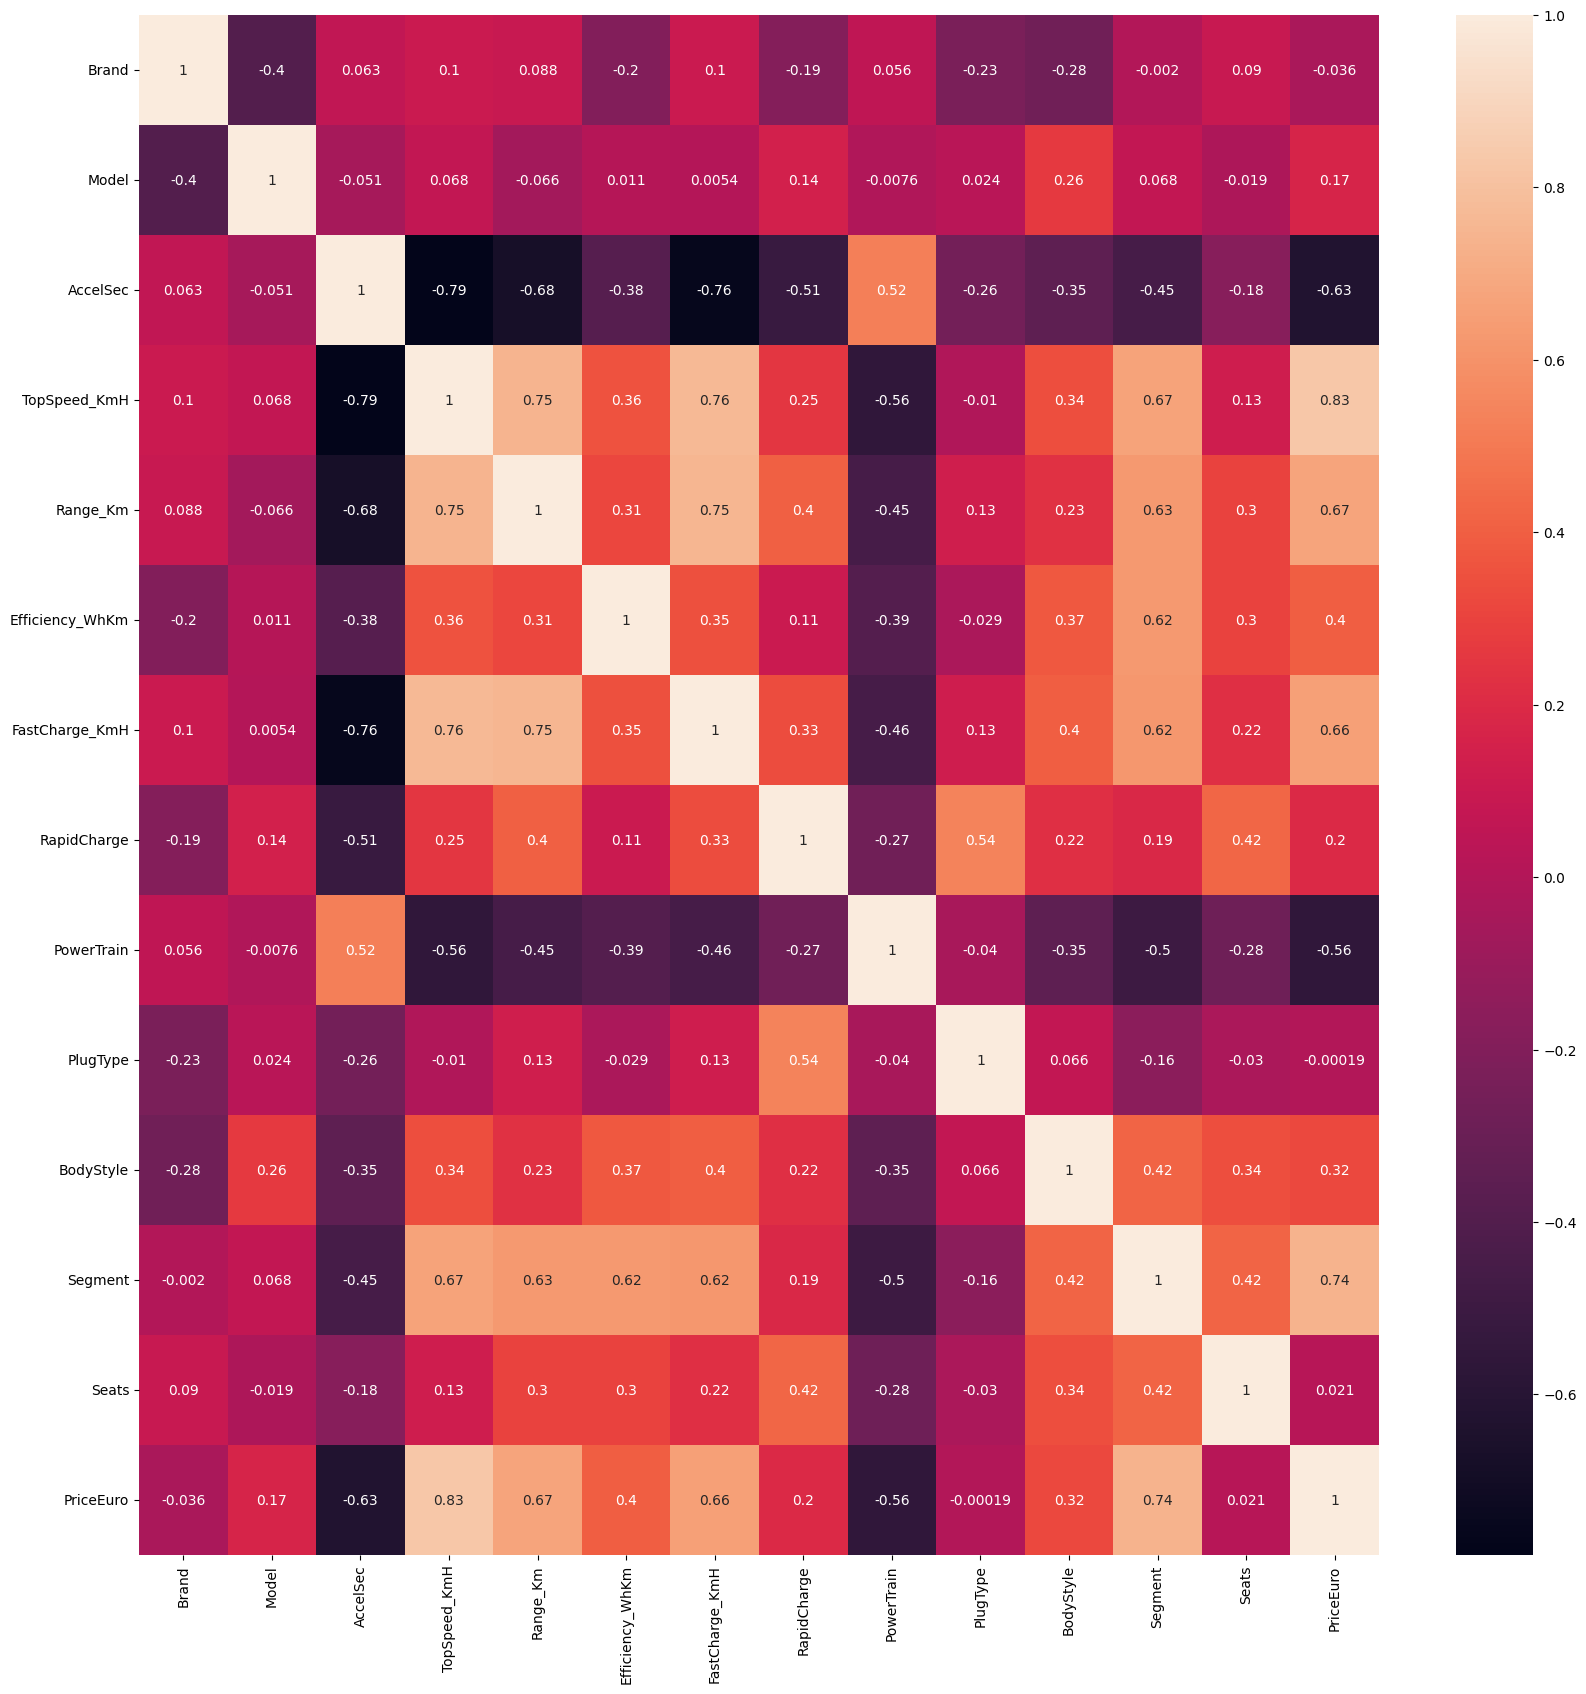

In [29]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [46]:
data = data.drop(columns=['Seats', 'BodyStyle','PlugType','Efficiency_WhKm','Brand','Model','RapidCharge'])

## Spliting the dataset for training and testing in ratio 80:20

In [47]:
X = data.drop(['PriceEuro'],axis=1)
Y = data['PriceEuro']

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

## Initialization of DecisionTreeRegressor model, and fitting the function for training the model.


In [49]:
regressor = DecisionTreeRegressor(max_depth=13)

In [50]:
regressor = regressor.fit(X_train,Y_train)

## Predicting the outcomes for X test

In [51]:
y_pred = regressor.predict(X_test)

## Assessing the model performance, by using sklearn metrics for regression

In [52]:
mae_tree = mean_absolute_error(y_pred, Y_test)
mse_tree = mean_squared_error(y_pred, Y_test)
print(mae_tree)
print(mse_tree)

11027.47619047619
327193308.04761904


In [53]:
r2_tree = r2_score(Y_test,y_pred)
print(r2_tree)

0.8411109134876441


## Initializing the XGBRegressor model, and using the fit function

In [59]:
model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=10,alpha=2,n_estimators=10)

Fit the model using the fit function

In [60]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:45:17] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

## Predicting the outcomes for X test

In [61]:
y_pred2 = model.predict(X_test)

## Assessing the model performance, by using sklearn metrics for regression

In [62]:
r2_xgb = r2_score(Y_test,y_pred2)
print(r2_xgb)

0.3403545022010803


In [63]:
mae_xgb = mean_absolute_error(y_pred2, Y_test)
mse_xgb = mean_squared_error(y_pred2, Y_test)

## Compare the performances of both model for at least three regression metircs

Comparing MSE:

In [64]:
print("Decision Tree Regressor - MSE: " + str(mse_tree))
print("XGBRegressor - MSE: " + str(mse_xgb))

Decision Tree Regressor - MSE: 327193308.04761904
XGBRegressor - MSE: 1358379008.0


Comparing MAE:

In [65]:
print("Decision Tree Regressor - MAE: " + str(mae_tree))
print("XGBRegressor - MAE: " + str(mae_xgb))

Decision Tree Regressor - MAE: 11027.47619047619
XGBRegressor - MAE: 20900.8515625


Comparing R2 Score:

In [66]:
print("Decision Tree Regressor - R2: " + str(r2_tree))
print("XGBRegressor - R2: " + str(r2_xgb))

Decision Tree Regressor - R2: 0.8411109134876441
XGBRegressor - R2: 0.3403545022010803
